# Laboratorium 3

Zadanie 1

In [1]:
def interpolate_lagrange(x_v,y_v):
    def return_function(x):
        sum = 0
        for i in range(len(x_v)):
            mul = 1
            for j in range(len(x_v)):
                if i==j:
                    continue # mul *= 1
                else:
                    mul *= (x-x_v[j])/(x_v[i]-x_v[j])
            sum += mul*y_v[i]
        return sum
    return return_function

x = [1,2,3]
y = [5,7,6]

print(interpolate_lagrange(x,y)(5))

-5.0


Zadanie 2

In [2]:
import math
import scipy
import numpy
import scipy.interpolate

import matplotlib.pyplot as plt
def f(x):
    return 1/(25*math.pow(x,2)+1)

#x,y do rysowania wykresów
x = scipy.linspace(-2,2,250)
y = [f(i) for i in x]

#węzły równoodległe
x_r = scipy.linspace(-2,2,21)
y_r = [f(i) for i in x_r]

#węły czebyszewa
n=21
a=-2 # przedział [-2,2]
b=2
x_c = [math.cos((2*k-1)*math.pi/(2*n)) for k in range (1,n+1)] # oryginalne węzły czebyszewa
#https://en.wikipedia.org/wiki/Chebyshev_nodes
x_c = [(b-a)/2*value+(b+a)/2 for value in x_c] 
y_c = [f(i) for i in x_c]


wielomian_r = interpolate_lagrange(x_r,y_r)
y_w_r = [wielomian_r(i) for i in x]
wielomian_c = interpolate_lagrange(x_c,y_c)
y_w_c = [wielomian_c(i) for i in x]

p = scipy.interpolate.InterpolatedUnivariateSpline(x_r,y_r,k=3)
p1 = scipy.interpolate.InterpolatedUnivariateSpline(x_r,y_r,k=3)


plt.figure(figsize=(10,8))
plt.plot(x,y, 'g-',label='f(x)')
plt.plot(x_r,y_r, 'co',label='węzły równoodległe')
plt.plot(x_c,y_c, 'ro',label='węzły Czebyszewa')
plt.plot(x,y_w_r,'c--',label='m. Lagrange\'a z węzłami równoodległymi')
plt.plot(x,y_w_c,'r--',label='m. Lagrange\'a z węzłami czebyszewa')
plt.ylim(-2,2)
plt.title('Interpolacja metodą Lagrange\'a',fontsize=18)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.legend(loc='upper right',prop={'size': 9})
plt.show()


plt.figure(figsize=(10,8))
plt.plot(x,y, 'g-',label='f(x)')
plt.plot(x_r,y_r, 'co',label='węzły równoodległe')
plt.plot(x_c,y_c, 'ro',label='węzły Czebyszewa')
plt.plot(x,p(x),'c--',label='m. f. sklejanych z węzłami równoodległymi')
plt.plot(x,p1(x),'r--',label='m. f. sklejanych z węzłami czebyszewa')
plt.title('Interpolacja metodą funkcji sklejanych',fontsize=18)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.legend(loc='upper right',prop={'size': 9})
plt.show()

<Figure size 1000x800 with 1 Axes>

<Figure size 1000x800 with 1 Axes>

Występuje tu efekt Rungego na brzegach.

Zadanie 3

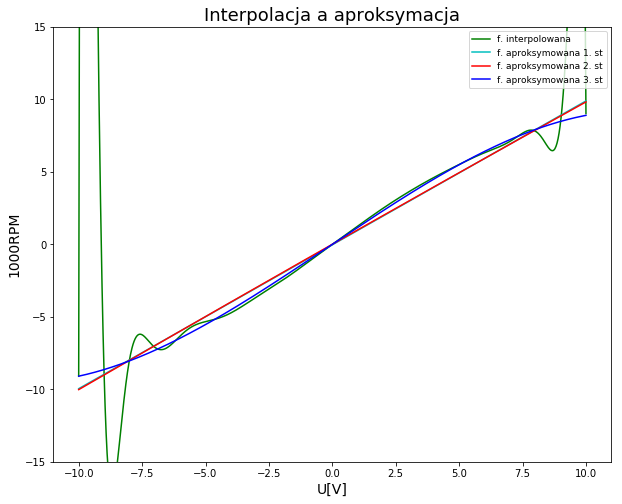

In [5]:
u = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
omega = [-9.10,-8.82,-7.99,-7.10,-6.32,-5.33,-4.73,-3.65,-2.52,-1.28,0.00,1.26,2.49,3.61,4.61,5.51,6.32,7.10,7.81,8.45,9.02]

funkcja_interpol = scipy.interpolate.lagrange(u,omega)
f_1 = numpy.poly1d(numpy.polyfit(u,omega,1))
f_2 = numpy.poly1d(numpy.polyfit(u,omega,2))
f_3 = numpy.poly1d(numpy.polyfit(u,omega,3))

x = scipy.linspace(-10,10,1000)

plt.figure(figsize=(10,8))
plt.plot(x,funkcja_interpol(x), 'g-',label='f. interpolowana')
plt.plot(x,f_1(x), 'c-',label='f. aproksymowana 1. st')
plt.plot(x,f_2(x), 'r-',label='f. aproksymowana 2. st')
plt.plot(x,f_3(x),'b-',label='f. aproksymowana 3. st')
plt.title('Interpolacja a aproksymacja',fontsize=18)
plt.xlabel('U[V]',fontsize=14)
plt.ylabel('1000RPM',fontsize=14)
plt.ylim(-15,15)
plt.legend(loc='upper right',prop={'size': 9})
plt.show()

Aproksymacja 3 rzędu jest zbliżona do interpolacji wielomianowej. Jednak są to węzły równoodległe czyli mamy doczynienia z efektem Rungego.

Zadanie 4

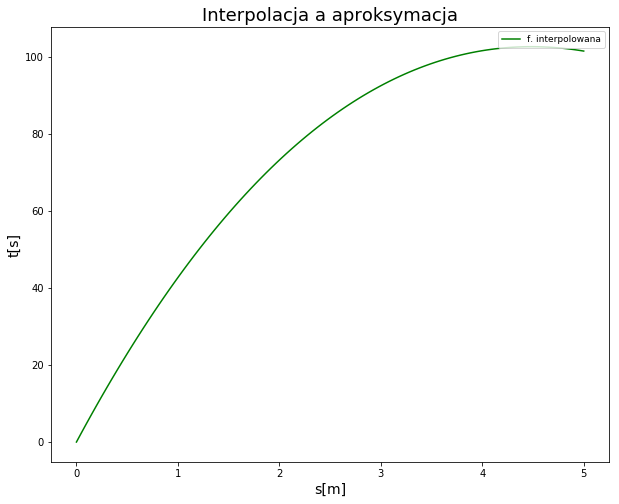

2.29 s
77.43 km/h


In [4]:
import scipy.misc
t = [0.0, 1.0, 2.0, 3.0]
s = [0.0, 42.7, 73.2, 92.5]
x_radaru = 79.6

f_interp = scipy.interpolate.interp1d(t,s)
f_1 = numpy.poly1d(numpy.polyfit(t,s,3)) # funkcja interpolująca s(t) do wyznaczenia stycznej (predkości) przy mijaniu radara

f_2 = numpy.poly1d(numpy.polyfit(s,t,3)) # funkcja interpolujaca t(s) do wyznaczenia czasu mijania radaru

a = scipy.linspace(0,5,100)
y = f_1(x_radaru)
v = scipy.misc.derivative(f_1,f_2(x_radaru),dx=0.01)

plt.figure(figsize=(10,8))
plt.plot(a,f_1(a), 'g-',label='f. interpolowana')

plt.title('Interpolacja a aproksymacja',fontsize=18)
plt.xlabel('s[m]',fontsize=14)
plt.ylabel('t[s]',fontsize=14)
plt.legend(loc='upper right',prop={'size': 9})
plt.show()

print(round(f_2(x_radaru),2),'s')
print(round(v*3.6,2),'km/h')